<a href="https://colab.research.google.com/github/nklingen/CS-433-Project-1/blob/master/scripts/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import datetime
# %run implementations.ipynb
%reload_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [6]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

# 1. First model: Raw Data

In [7]:
# first to split the data into training and testing

ratio = 0.8
seed = 3

x_tr, x_te, y_tr, y_te = split_data(tX, y, ratio, seed)

### Plotting a correlation matrix to see which of our features are highly correlated:

In [0]:
feat_corr_matrix = np.corrcoef(tX.T)
#print (feat_corr_matrix)

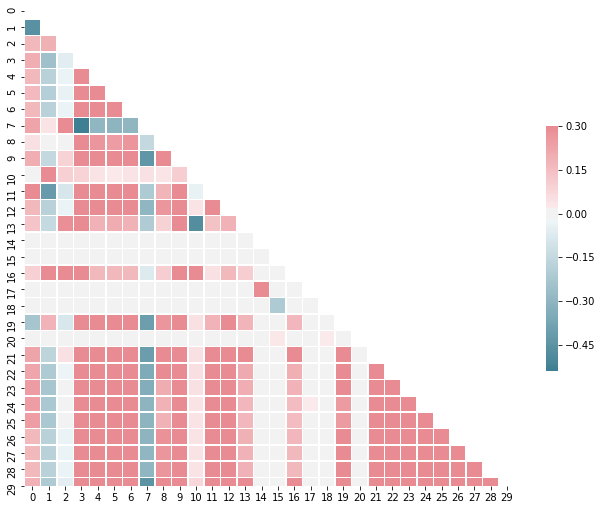

In [25]:
# Generate a mask for the upper triangle
mask = np.zeros_like(feat_corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(feat_corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 1.1 Training using Least Squares

In [7]:
# First Model using least squares

weights = least_squares(y_tr, x_tr)
MSE_tr = compute_loss(y_tr, x_tr, weights)
MSE_te = compute_loss(y_te, x_te, weights)

print("Training MSE: ", MSE_tr, "\nTesting MSE:", MSE_te)
#0.3394801404386906  0.34056956713540926

Training MSE:  0.3394801404386872 
Testing MSE: 0.3405695670310389


### 1.2 Prediction using Least squares

In [8]:
# predict on the test data slice
y_pred = predict_labels(weights, x_te)
# Check accuracy
print("Prediction Accuracy: ", np.mean(y_te==y_pred)) # 0.34396

Prediction Accuracy:  0.74242


# 2. Second Model: Pre-processing removing all NaNs

In [0]:
# removing all nan but there actually are none
tX_2 = tX[~np.isnan(tX).any(axis=1)]

# removing all rows with -999, there are 181886
y = y[np.all(tX_2 != -999, axis=1)]
tX_2 = tX_2[np.all(tX_2 != -999, axis=1)]

x_tr, x_te, y_tr, y_te = split_data(tX_2, y, ratio, seed)

# then to standardize x_tr and x_te
x_tr = standardize(x_tr)[0]
x_te = standardize(x_te)[0]

# next to add a column of ones
y_tr, x_tr = build_model_data(x_tr, y_tr)
y_te, x_te = build_model_data(x_te, y_te)

### 2.1 Training using Least Squares removing NaNs

In [10]:
weights = least_squares(y_tr, x_tr)
MSE_tr = compute_loss(y_tr, x_tr, weights)
MSE_te = compute_loss(y_te, x_te, weights)

print("Training MSE: ", MSE_tr, "\nTesting MSE:", MSE_te) 
#0.36864162046559024 0.5411866496785176

Training MSE:  0.3686416204656051 
Testing MSE: 0.541116014511367


### 2.2 Prediction using Least Squares removing NaNs

In [11]:
# predict on the test data slice
y_pred = predict_labels(weights, x_te)
# Check accuracy
print("Prediction Accuracy: ", np.mean(y_te==y_pred)) # 0.6121265506863393

Prediction Accuracy:  0.6120531454158409


# 3. Third Model: Better Pre-processing replacing NaNs

In [0]:
# replace nans with mean

tX_3 = replace_nan_with_mean(tX, -999)
x_tr, x_te, y_tr, y_te = split_data(tX_3, y, ratio, seed)

# then to standardize x_tr and x_te
x_tr = standardize(x_tr)[0]
x_te = standardize(x_te)[0]

# next to add a column of ones
y_tr, x_tr = build_model_data(x_tr, y_tr)
y_te, x_te = build_model_data(x_te, y_te)

### 3.1 Training using Least Squares replacing NaNs

In [0]:
weights = least_squares(y_tr, x_tr)
MSE_tr = compute_loss(y_tr, x_tr, weights)
MSE_te = compute_loss(y_te, x_te, weights)

print("Training MSE: ", MSE_tr, "\nTesting MSE:", MSE_te) 
#0.4978447945914067  0.6275084689089252

Training MSE:  0.4978447945914067 
Testing MSE: 0.6275084689089252


### 3.2 Prediction using Least Squares replacing NaNs

In [0]:
# predict on the test data slice
y_pred = predict_labels(weights, x_te)
# Check accuracy
print("Prediction Accuracy: ", np.mean(y_te==y_pred)) # 0.6121265506863393

Prediction Accuracy:  0.5331424796300375


# 4. Fourth Model: Feature Augmentation

### 4. 1 Feature Augmentation on Raw Data

In [0]:
ratio = 0.8
seed = 1
x_tr, x_te, y_tr, y_te = split_data(tX, y, ratio, seed)

degrees = [1, 2, 3, 4, 5, 6, 7, 8]


for ind, degree in enumerate(degrees):

    polynome = build_poly(x_tr,degree)
    weights = least_squares(y_tr, polynome)
    MSE = compute_loss(y_tr, polynome, weights)
    rmse = np.sqrt(2*MSE)
    
    polynome_te = build_poly(x_te,degree)
    y_pred = predict_labels(weights, polynome_te)

    print("Processing {i}th experiment, degree={d}, rmse={loss}".format( 
        i=ind + 1, d=degree, loss=rmse))
    print("Prediction Accuracy: ", str(np.mean(y_te == y_pred)) + "\n")
    
# Degree of 4 seems optimal (6 is overfitting it seems)

Processing 1th experiment, degree=1, rmse=0.8239257849571571
Prediction Accuracy:  0.74402

Processing 2th experiment, degree=2, rmse=0.7990539549852868
Prediction Accuracy:  0.76944

Processing 3th experiment, degree=3, rmse=0.788424663107187
Prediction Accuracy:  0.77844

Processing 4th experiment, degree=4, rmse=0.7786936013526474
Prediction Accuracy:  0.7884

Processing 5th experiment, degree=5, rmse=0.7979556716445746
Prediction Accuracy:  0.7775

Processing 6th experiment, degree=6, rmse=0.7649938635511518
Prediction Accuracy:  0.79966

Processing 7th experiment, degree=7, rmse=2893718.602071626
Prediction Accuracy:  0.47306

Processing 8th experiment, degree=8, rmse=2266262.8281303146
Prediction Accuracy:  0.5427



### 4.2 Feature Augementation removing NaNs

In [0]:
ratio = 0.8
seed = 1
x_tr, x_te, y_tr, y_te = split_data(tX_2, y, ratio, seed)

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


for ind, degree in enumerate(degrees):

    polynome = build_poly(x_tr,degree)
    weights = least_squares(y_tr, polynome)
    MSE = compute_loss(y_tr, polynome, weights)
    rmse = np.sqrt(2*MSE)
    
    polynome_te = build_poly(x_te,degree)
    y_pred = predict_labels(weights, polynome_te)

    print("Processing {i}th experiment, degree={d}, rmse={loss}".format( 
        i=ind + 1, d=degree, loss=rmse))
    print("Prediction Accuracy: ", str(np.mean(y_te == y_pred)) + "\n")
    
# Degree of 9 seems optimal

Processing 1th experiment, degree=1, rmse=0.8595472059393301
Prediction Accuracy:  0.7209865668354988

Processing 2th experiment, degree=2, rmse=0.8180119618944975
Prediction Accuracy:  0.7653233502165455

Processing 3th experiment, degree=3, rmse=0.7950250798192138
Prediction Accuracy:  0.7857300154151068

Processing 4th experiment, degree=4, rmse=0.7824540912580449
Prediction Accuracy:  0.7980621008588417

Processing 5th experiment, degree=5, rmse=0.7779028561821488
Prediction Accuracy:  0.7998238273508038

Processing 6th experiment, degree=6, rmse=0.7726834497676207
Prediction Accuracy:  0.8031270645232328

Processing 7th experiment, degree=7, rmse=0.7557874987888077
Prediction Accuracy:  0.8123027233355354

Processing 8th experiment, degree=8, rmse=0.7371216575803359
Prediction Accuracy:  0.8225060559348161

Processing 9th experiment, degree=9, rmse=0.7285225907993939
Prediction Accuracy:  0.827350803787712

Processing 10th experiment, degree=10, rmse=0.7278725366831396
Prediction 

###  Feature Augementation replacing NaNs

In [0]:
ratio = 0.8
seed = 1
x_tr, x_te, y_tr, y_te = split_data(tX_3, y, ratio, seed)

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


for ind, degree in enumerate(degrees):

    polynome = build_poly(x_tr,degree)
    weights = least_squares(y_tr, polynome)
    MSE = compute_loss(y_tr, polynome, weights)
    rmse = np.sqrt(2*MSE)
    
    polynome_te = build_poly(x_te,degree)
    y_pred = predict_labels(weights, polynome_te)

    print("Processing {i}th experiment, degree={d}, rmse={loss}".format( 
        i=ind + 1, d=degree, loss=rmse))
    print("Prediction Accuracy: ", str(np.mean(y_te == y_pred)) + "\n")
    
# Degree of 9 seems optimal

Processing 1th experiment, degree=1, rmse=0.9978758293721322
Prediction Accuracy:  0.5319679953020627

Processing 2th experiment, degree=2, rmse=0.9977151297869898
Prediction Accuracy:  0.5308669162445864

Processing 3th experiment, degree=3, rmse=0.9974064350165527
Prediction Accuracy:  0.5316009689495705

Processing 4th experiment, degree=4, rmse=0.9970844513748015
Prediction Accuracy:  0.5286647581296338

Processing 5th experiment, degree=5, rmse=0.996862156198522
Prediction Accuracy:  0.5277104896131543

Processing 6th experiment, degree=6, rmse=0.9966915013548663
Prediction Accuracy:  0.5262423842031858

Processing 7th experiment, degree=7, rmse=0.9964604356881909
Prediction Accuracy:  0.52697643690817

Processing 8th experiment, degree=8, rmse=0.9961572986651697
Prediction Accuracy:  0.5287381634001321

Processing 9th experiment, degree=9, rmse=0.9959695949502358
Prediction Accuracy:  0.52697643690817

Processing 10th experiment, degree=10, rmse=0.9955706395713501
Prediction Accu

In [0]:
 ## WORK IN PROGRESS ###

# 4. Model 1 with Ridge Regression

In [0]:
## we noticed that the first model had the best accuracy, without any pre-processing.
## we then applied ridge regression to the first model.
ratio = 0.8
seed = 1
x_tr, x_te, y_tr, y_te = split_data(tX, y, ratio, seed)


### 4.1 Ridge Regressiong

In [0]:
lambdas = [0, 1e-15, 1e-10, 1e-5, 1, 1e1, 1000]

for lambda_ in lambdas:
    
    w, loss = ridge_regression(y_tr, x_tr, lambda_)
    y_pred = predict_labels(w, x_te)
    print("Lambda=" + str(lambda_)+"; Loss="+str(loss))

    # predict on the test data slice
    y_pred = predict_labels(w, x_te)
    # Check accuracy
    print("Prediction Accuracy: ", str(np.mean(y_te == y_pred)) + "\n")
    # Best for lambda = 0, Accuracy = 0.744

Lambda=0; Loss=0.33942684955862673
Prediction Accuracy:  0.74402

Lambda=1e-15; Loss=0.33942684955862695
Prediction Accuracy:  0.74402

Lambda=1e-10; Loss=0.33942684959099034
Prediction Accuracy:  0.74402

Lambda=1e-05; Loss=0.3394308610386454
Prediction Accuracy:  0.744

Lambda=1; Loss=0.35329072520671573
Prediction Accuracy:  0.73516

Lambda=10.0; Loss=0.35648911776731346
Prediction Accuracy:  0.734

Lambda=1000; Loss=0.3820216654176733
Prediction Accuracy:  0.69854



### 4.2 Regularized Ridge Regression

In [0]:
lambdas = [0, 1e-15, 1e-10, 1e-5, 1, 1e1, 1000]

max_iter = 10
gamma = 0.01
lambda_ = 0.3
threshold = 1e-8
losses = []

w = np.zeros((x_tr.shape[1], 1))

# start the logistic regression
for iter in range(max_iter):
    # get loss and update w.
    loss, w = learning_by_penalized_gradient(y_tr, x_tr, w, gamma, lambda_)
    # log info
    if iter % 100 == 0:
        print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
    # converge criterion
    losses.append(loss)
    if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
        break
# visualization
visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
print("loss={l}".format(l=calculate_loss(y, tx, w)))


### 2.2.1  GD for Second Model : train

In [0]:
# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.08

# Initialization
w_initial = np.ones(x_tr.shape[1])

gradient_w, gradient_loss = least_squares_GD(y_tr, x_tr, w_initial, max_iters, gamma) 

print("Gradient final loss for w* = " + str(gradient_loss)) # 0.4131388507357264

Step 1/150 loss = 16.742723002367942
Step 2/150 loss = 13.640113171583614
Step 3/150 loss = 11.197208614873603
Step 4/150 loss = 9.241386941981181
Step 5/150 loss = 7.6637217309515515
Step 6/150 loss = 6.386469086966029
Step 7/150 loss = 5.350289705071333
Step 8/150 loss = 4.5084324324530805
Step 9/150 loss = 3.8235432932229134
Step 10/150 loss = 3.2655939588419374
Step 11/150 loss = 2.8103795766576725
Step 12/150 loss = 2.4383641700028043
Step 13/150 loss = 2.133768862969578
Step 14/150 loss = 1.883843255860377
Step 15/150 loss = 1.6782801536029566
Step 16/150 loss = 1.5087443685174633
Step 17/150 loss = 1.3684929531113643
Step 18/150 loss = 1.2520689442005608
Step 19/150 loss = 1.1550542964765451
Step 20/150 loss = 1.0738705085735656
Step 21/150 loss = 1.005617694447243
Step 22/150 loss = 0.9479446554141303
Step 23/150 loss = 0.8989439562644814
Step 24/150 loss = 0.8570671735948378
Step 25/150 loss = 0.8210564219510524
Step 26/150 loss = 0.7898890181788069
Step 27/150 loss = 0.762732

### 2.2.2  GD for Second Model : predict

In [0]:
# predict on the train data slice using the gradient_w
y_pred = predict_labels(gradient_w, x_tr)
# Check accuracy
print(np.mean(y_tr == y_pred)) # 0.6810115431906186

# predict on the test data slice
y_pred = predict_labels(gradient_w, x_te)
# Check accuracy
print(np.mean(y_te == y_pred)) # 0.687954195111209

0.6810115431906186
0.687954195111209


### 2.3  Ridge regression for Second Model : train

In [0]:
# TODO

#  Logistic regression for Second Model

In [0]:
from ML_methods import *

initial_w = np.zeros(tX.shape[1])
max_iters = 2000
gamma = 4.5e-10

y_tr_log_reg = y_tr>0


w, mse = logistic_regression(y_tr_log_reg, x_tr, initial_w, max_iters, gamma, batch_size=64)

print(w)
print(mse)

Logistic Regression (1/2000): loss=0.6917259022280502
Logistic Regression (2/2000): loss=0.6872342727298547
Logistic Regression (3/2000): loss=0.6832335819969858
Logistic Regression (4/2000): loss=0.6781414732496351
Logistic Regression (5/2000): loss=0.6739916255158099
Logistic Regression (6/2000): loss=0.6708053172464308
Logistic Regression (7/2000): loss=0.6686612226517009
Logistic Regression (8/2000): loss=0.6643994087613666
Logistic Regression (9/2000): loss=0.6606623426823868
Logistic Regression (10/2000): loss=0.6586863979844305
Logistic Regression (11/2000): loss=0.6561880771900984
Logistic Regression (12/2000): loss=0.6537547500238531
Logistic Regression (13/2000): loss=0.6504786643993647
Logistic Regression (14/2000): loss=0.6484865383981637
Logistic Regression (15/2000): loss=0.6477972721571535
Logistic Regression (16/2000): loss=0.6470696055431121
Logistic Regression (17/2000): loss=0.6451588772521825
Logistic Regression (18/2000): loss=0.6450234922638917
Logistic Regression

Logistic Regression (151/2000): loss=0.6232972102728058
Logistic Regression (152/2000): loss=0.6232125143311411
Logistic Regression (153/2000): loss=0.6232549370005677
Logistic Regression (154/2000): loss=0.6232487075199068
Logistic Regression (155/2000): loss=0.623193444790672
Logistic Regression (156/2000): loss=0.6231297699930868
Logistic Regression (157/2000): loss=0.6231263679983194
Logistic Regression (158/2000): loss=0.6230655578658937
Logistic Regression (159/2000): loss=0.6230355580893265
Logistic Regression (160/2000): loss=0.6230608519207745
Logistic Regression (161/2000): loss=0.6231010016073661
Logistic Regression (162/2000): loss=0.6230657005711558
Logistic Regression (163/2000): loss=0.6229625311494973
Logistic Regression (164/2000): loss=0.622887473321195
Logistic Regression (165/2000): loss=0.6228223252610894
Logistic Regression (166/2000): loss=0.6228304100628129
Logistic Regression (167/2000): loss=0.622784898740348
Logistic Regression (168/2000): loss=0.622829076279

Logistic Regression (299/2000): loss=0.6184743669918089
Logistic Regression (300/2000): loss=0.6184901810821215
Logistic Regression (301/2000): loss=0.6185203495005206
Logistic Regression (302/2000): loss=0.6184761372103409
Logistic Regression (303/2000): loss=0.618403007651704
Logistic Regression (304/2000): loss=0.6183137164493663
Logistic Regression (305/2000): loss=0.6182721554699527
Logistic Regression (306/2000): loss=0.6182367575913537
Logistic Regression (307/2000): loss=0.618214557257355
Logistic Regression (308/2000): loss=0.6181805237285155
Logistic Regression (309/2000): loss=0.6181598482026964
Logistic Regression (310/2000): loss=0.6181141532273603
Logistic Regression (311/2000): loss=0.6180757394922274
Logistic Regression (312/2000): loss=0.6180385397714204
Logistic Regression (313/2000): loss=0.6180102545472889
Logistic Regression (314/2000): loss=0.6179677226067923
Logistic Regression (315/2000): loss=0.6179495121423415
Logistic Regression (316/2000): loss=0.61792763921

Logistic Regression (447/2000): loss=0.61475210176265
Logistic Regression (448/2000): loss=0.6147380915639816
Logistic Regression (449/2000): loss=0.6147093790801206
Logistic Regression (450/2000): loss=0.6146912037949773
Logistic Regression (451/2000): loss=0.6147180240591001
Logistic Regression (452/2000): loss=0.6146801498399005
Logistic Regression (453/2000): loss=0.6147163319370132
Logistic Regression (454/2000): loss=0.6146213771759332
Logistic Regression (455/2000): loss=0.6145099520343331
Logistic Regression (456/2000): loss=0.6145613152495836
Logistic Regression (457/2000): loss=0.6144124221311972
Logistic Regression (458/2000): loss=0.6144830649330116
Logistic Regression (459/2000): loss=0.6144745261795181
Logistic Regression (460/2000): loss=0.6143664673776664
Logistic Regression (461/2000): loss=0.6143406022184564
Logistic Regression (462/2000): loss=0.6143358992411956
Logistic Regression (463/2000): loss=0.6142967892618163
Logistic Regression (464/2000): loss=0.61429104181

Logistic Regression (595/2000): loss=0.6116619163937091
Logistic Regression (596/2000): loss=0.611669748245937
Logistic Regression (597/2000): loss=0.6115550308110358
Logistic Regression (598/2000): loss=0.6115049631898876
Logistic Regression (599/2000): loss=0.611487979904978
Logistic Regression (600/2000): loss=0.611555318031261
Logistic Regression (601/2000): loss=0.6115295406253662
Logistic Regression (602/2000): loss=0.6115400126303335
Logistic Regression (603/2000): loss=0.6115495423836459
Logistic Regression (604/2000): loss=0.6115404714142227
Logistic Regression (605/2000): loss=0.6115064029012397
Logistic Regression (606/2000): loss=0.6114375065965723
Logistic Regression (607/2000): loss=0.6114772946728553
Logistic Regression (608/2000): loss=0.6114225570023026
Logistic Regression (609/2000): loss=0.6114951957121577
Logistic Regression (610/2000): loss=0.6113643970013247
Logistic Regression (611/2000): loss=0.6113010834825954
Logistic Regression (612/2000): loss=0.611287959534

Logistic Regression (743/2000): loss=0.6092976845329594
Logistic Regression (744/2000): loss=0.6092584727892306
Logistic Regression (745/2000): loss=0.6092864946860548
Logistic Regression (746/2000): loss=0.6092286980864919
Logistic Regression (747/2000): loss=0.609231335908273
Logistic Regression (748/2000): loss=0.6091987598000712
Logistic Regression (749/2000): loss=0.6091629402094592
Logistic Regression (750/2000): loss=0.6091723481822391
Logistic Regression (751/2000): loss=0.6091338823370349
Logistic Regression (752/2000): loss=0.6091507448001169
Logistic Regression (753/2000): loss=0.6090722676896759
Logistic Regression (754/2000): loss=0.6090486585391299
Logistic Regression (755/2000): loss=0.6091158430182694
Logistic Regression (756/2000): loss=0.6091473355293966
Logistic Regression (757/2000): loss=0.6091339146202964
Logistic Regression (758/2000): loss=0.6090651473032392
Logistic Regression (759/2000): loss=0.609056723530417
Logistic Regression (760/2000): loss=0.60899647606

Logistic Regression (891/2000): loss=0.6072591855034266
Logistic Regression (892/2000): loss=0.6074047225657494
Logistic Regression (893/2000): loss=0.6076407500838996
Logistic Regression (894/2000): loss=0.6075542474386643
Logistic Regression (895/2000): loss=0.6076195470110614
Logistic Regression (896/2000): loss=0.6075200015146174
Logistic Regression (897/2000): loss=0.6075559178831241
Logistic Regression (898/2000): loss=0.6074703395215243
Logistic Regression (899/2000): loss=0.6074304873676819
Logistic Regression (900/2000): loss=0.6072997794236046
Logistic Regression (901/2000): loss=0.607110464624352
Logistic Regression (902/2000): loss=0.6071135917078396
Logistic Regression (903/2000): loss=0.607135461943159
Logistic Regression (904/2000): loss=0.6070937102910885
Logistic Regression (905/2000): loss=0.6071480939447352
Logistic Regression (906/2000): loss=0.607086933293259
Logistic Regression (907/2000): loss=0.6070603620383667
Logistic Regression (908/2000): loss=0.607117191337

Logistic Regression (1039/2000): loss=0.6059386654748637
Logistic Regression (1040/2000): loss=0.6060794276408875
Logistic Regression (1041/2000): loss=0.6060708638247256
Logistic Regression (1042/2000): loss=0.606128523195775
Logistic Regression (1043/2000): loss=0.6060117831040679
Logistic Regression (1044/2000): loss=0.6057995075988621
Logistic Regression (1045/2000): loss=0.6056432413330262
Logistic Regression (1046/2000): loss=0.6057351842693952
Logistic Regression (1047/2000): loss=0.605613414274955
Logistic Regression (1048/2000): loss=0.6056990422727422
Logistic Regression (1049/2000): loss=0.6058450992719858
Logistic Regression (1050/2000): loss=0.6057346645099978
Logistic Regression (1051/2000): loss=0.6057641869877735
Logistic Regression (1052/2000): loss=0.6058750364960527
Logistic Regression (1053/2000): loss=0.6059283603397466
Logistic Regression (1054/2000): loss=0.605944285647555
Logistic Regression (1055/2000): loss=0.6059717146569844
Logistic Regression (1056/2000): l

Logistic Regression (1185/2000): loss=0.6039943170967982
Logistic Regression (1186/2000): loss=0.603996538978508
Logistic Regression (1187/2000): loss=0.604007197423438
Logistic Regression (1188/2000): loss=0.6039960699449518
Logistic Regression (1189/2000): loss=0.603990258767998
Logistic Regression (1190/2000): loss=0.6039685823116724
Logistic Regression (1191/2000): loss=0.6039459883593234
Logistic Regression (1192/2000): loss=0.6039303663043999
Logistic Regression (1193/2000): loss=0.6039188896302093
Logistic Regression (1194/2000): loss=0.6039190170119724
Logistic Regression (1195/2000): loss=0.6038934019214026
Logistic Regression (1196/2000): loss=0.6038823801504948
Logistic Regression (1197/2000): loss=0.6038703702622513
Logistic Regression (1198/2000): loss=0.6038525688697645
Logistic Regression (1199/2000): loss=0.6038413234659039
Logistic Regression (1200/2000): loss=0.6038497665609198
Logistic Regression (1201/2000): loss=0.6038059469377701
Logistic Regression (1202/2000): l

Logistic Regression (1329/2000): loss=0.6026696515988598
Logistic Regression (1330/2000): loss=0.6026693987812416
Logistic Regression (1331/2000): loss=0.6026545428450539
Logistic Regression (1332/2000): loss=0.6026474183330292
Logistic Regression (1333/2000): loss=0.602648009453348
Logistic Regression (1334/2000): loss=0.6026345117708909
Logistic Regression (1335/2000): loss=0.6026293234211726
Logistic Regression (1336/2000): loss=0.6026642217107591
Logistic Regression (1337/2000): loss=0.6026734255478415
Logistic Regression (1338/2000): loss=0.6026450441315018
Logistic Regression (1339/2000): loss=0.6026285434164554
Logistic Regression (1340/2000): loss=0.6026404528565024
Logistic Regression (1341/2000): loss=0.6026873630921341
Logistic Regression (1342/2000): loss=0.6026274961865106
Logistic Regression (1343/2000): loss=0.6025910835528164
Logistic Regression (1344/2000): loss=0.6025894490639935
Logistic Regression (1345/2000): loss=0.6025787019158854
Logistic Regression (1346/2000):

Logistic Regression (1475/2000): loss=0.6015453054593869
Logistic Regression (1476/2000): loss=0.601542525731316
Logistic Regression (1477/2000): loss=0.601465350237978
Logistic Regression (1478/2000): loss=0.6014934666699528
Logistic Regression (1479/2000): loss=0.6014390181414518
Logistic Regression (1480/2000): loss=0.6014372310433724
Logistic Regression (1481/2000): loss=0.6014268701707954
Logistic Regression (1482/2000): loss=0.6014073538400374
Logistic Regression (1483/2000): loss=0.6013945240861349
Logistic Regression (1484/2000): loss=0.6013862823502589
Logistic Regression (1485/2000): loss=0.6013901398803723
Logistic Regression (1486/2000): loss=0.6013972161087949
Logistic Regression (1487/2000): loss=0.6014400372633509
Logistic Regression (1488/2000): loss=0.6014269267731682
Logistic Regression (1489/2000): loss=0.6013584672151221
Logistic Regression (1490/2000): loss=0.6013453284217758
Logistic Regression (1491/2000): loss=0.6013758328702378
Logistic Regression (1492/2000): 

Logistic Regression (1619/2000): loss=0.6005145629969844
Logistic Regression (1620/2000): loss=0.6004859520438098
Logistic Regression (1621/2000): loss=0.6004424136498425
Logistic Regression (1622/2000): loss=0.600421340056642
Logistic Regression (1623/2000): loss=0.6004322084145555
Logistic Regression (1624/2000): loss=0.6004045477465308
Logistic Regression (1625/2000): loss=0.6003902242577462
Logistic Regression (1626/2000): loss=0.6003985811403632
Logistic Regression (1627/2000): loss=0.6003823824726523
Logistic Regression (1628/2000): loss=0.6003648322317064
Logistic Regression (1629/2000): loss=0.6003854528426104
Logistic Regression (1630/2000): loss=0.600487324087209
Logistic Regression (1631/2000): loss=0.6005424832054679
Logistic Regression (1632/2000): loss=0.600626465481403
Logistic Regression (1633/2000): loss=0.6006276738366434
Logistic Regression (1634/2000): loss=0.600506700175616
Logistic Regression (1635/2000): loss=0.6005576036606771
Logistic Regression (1636/2000): lo

Logistic Regression (1765/2000): loss=0.5994501690910672
Logistic Regression (1766/2000): loss=0.5994591589041894
Logistic Regression (1767/2000): loss=0.5994601815725675
Logistic Regression (1768/2000): loss=0.599561411198066
Logistic Regression (1769/2000): loss=0.5997307995276343
Logistic Regression (1770/2000): loss=0.5998040589215502
Logistic Regression (1771/2000): loss=0.5995966503429006
Logistic Regression (1772/2000): loss=0.599611940614923
Logistic Regression (1773/2000): loss=0.599667964423913
Logistic Regression (1774/2000): loss=0.5997645364809672
Logistic Regression (1775/2000): loss=0.5996979123297287
Logistic Regression (1776/2000): loss=0.5998389008732812
Logistic Regression (1777/2000): loss=0.5997649555247491
Logistic Regression (1778/2000): loss=0.6001338561744807
Logistic Regression (1779/2000): loss=0.6002519795127715
Logistic Regression (1780/2000): loss=0.6003013641612786
Logistic Regression (1781/2000): loss=0.6003649058637415
Logistic Regression (1782/2000): l

Logistic Regression (1911/2000): loss=0.5986345291343477
Logistic Regression (1912/2000): loss=0.5986676425965112
Logistic Regression (1913/2000): loss=0.5986490145321404
Logistic Regression (1914/2000): loss=0.5986660685563698
Logistic Regression (1915/2000): loss=0.598671367894182
Logistic Regression (1916/2000): loss=0.5986218718151763
Logistic Regression (1917/2000): loss=0.5985871185784204
Logistic Regression (1918/2000): loss=0.5985720457004111
Logistic Regression (1919/2000): loss=0.5985890919269025
Logistic Regression (1920/2000): loss=0.5986111431877966
Logistic Regression (1921/2000): loss=0.5985902460894569
Logistic Regression (1922/2000): loss=0.5985493800914393
Logistic Regression (1923/2000): loss=0.5985463804865364
Logistic Regression (1924/2000): loss=0.5985458608425706
Logistic Regression (1925/2000): loss=0.5985488576528265
Logistic Regression (1926/2000): loss=0.5985516978558804
Logistic Regression (1927/2000): loss=0.5985378292536241
Logistic Regression (1928/2000):

In [0]:
# Test Logistic regression
# predict on the test data slice
y_pred = predict_labels(w, x_te)
# Check accuracy
np.mean(y_te==y_pred) # 0.580766304

0.580766304

## Regularized Logistic Regression Regularized

In [0]:
from ML_methods import *

initial_w = np.zeros(tX.shape[1])
y_tr_reg_log_reg = y_tr>0

max_iters = 2000
gamma = 1e-9
lambda_ = 1

w, mse = reg_logistic_regression(y_tr_reg_log_reg, x_tr, lambda_, initial_w, max_iters, gamma, batch_size=64)

In [0]:
# Test Regularized Logistic regression
# predict on the test data slice
y_pred = predict_labels(w, x_te)
# Check accuracy
np.mean(y_te==y_pred) # 0.617529328

0.617529328

## 3. Third Model: replace all the nanValues with the column mean

In [0]:
tX_3 = replace_nan_with_mean(tX, -999)
x_tr, x_te, y_tr, y_te = split_data(tX_3, y, ratio, seed)

x_tr = standardize(x_tr)[0]
x_te = standardize(x_te)[0]

y_tr, x_tr = build_model_data(x_tr, y_tr)
y_te, x_te = build_model_data(x_te, y_te)

### 3.1.1 Third Model: Use least_squares : train

In [0]:
weights = least_squares(y_tr, x_tr)
MSE_tr = compute_loss(y_tr, x_tr, weights)
MSE_te = compute_loss(y_te, x_te, weights)

### 3.1.2 Third Model: Use least_squares: prediction

In [0]:
# predict on the test data slice
y_pred = predict_labels(weights, x_te)
# Check accuracy
np.mean(y_te==y_pred) # 0.5331424796300375

0.5331424796300375

### 3.2.1 Third Model: Use GD : Train

In [0]:
# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.08

# Initialization
w_initial = np.ones(x_tr.shape[1])

gradient_w, gradient_loss = least_squares_GD(y_tr, x_tr, w_initial, max_iters, gamma) 

print("Gradient final loss for w* = " + str(gradient_loss)) # 0.5114768097194176


Step 1/150 loss = 17.3154463737639
Step 2/150 loss = 12.85154559694335
Step 3/150 loss = 10.15793488186781
Step 4/150 loss = 8.393558092837578
Step 5/150 loss = 7.146208061898221
Step 6/150 loss = 6.207766930275749
Step 7/150 loss = 5.468531107274753
Step 8/150 loss = 4.867250480498854
Step 9/150 loss = 4.3672931475690016
Step 10/150 loss = 3.945107348603659
Step 11/150 loss = 3.584507879895943
Step 12/150 loss = 3.2737494035344157
Step 13/150 loss = 3.003955009009131
Step 14/150 loss = 2.7682204992546464
Step 15/150 loss = 2.5610681557279027
Step 16/150 loss = 2.3780904919748433
Step 17/150 loss = 2.21570384800992
Step 18/150 loss = 2.0709699189386193
Step 19/150 loss = 1.9414621183893161
Step 20/150 loss = 1.8251632119498742
Step 21/150 loss = 1.7203857016225739
Step 22/150 loss = 1.6257092655990009
Step 23/150 loss = 1.5399312431392211
Step 24/150 loss = 1.4620272297442516
Step 25/150 loss = 1.391119576400008
Step 26/150 loss = 1.3264521046700706
Step 27/150 loss = 1.267369730900883

### 3.2.2 Third Model: Use GD : Predict

In [0]:
# predict on the test data slice
y_pred = predict_labels(gradient_w, x_te)
# Check accuracy
np.mean(y_te==y_pred) # 0.5006239447992366

0.5006239447992366

## 4. Fourth Model with Feature Augmentation

ValueError: shapes (54491,32) and (54491,) not aligned: 32 (dim 1) != 54491 (dim 0)

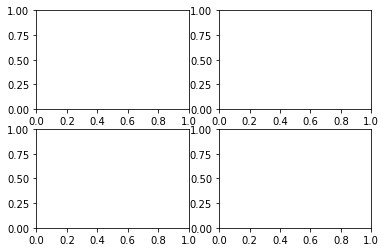

In [0]:

degrees = [1, 2, 3, 4]

# define the structure of the figure
num_row = 2
num_col = 2
f, axs = plt.subplots(num_row, num_col)
    
for ind, degree in enumerate(degrees):

        polynome = build_poly(x_tr,degree)
        w = least_squares(y_tr, polynome.T)
        MSE = compute_loss(y_tr, polynome, w)

        print("Processing {i}th experiment, degree={d}, mse={loss}".format( 
            i=ind + 1, d=degree, loss=MSE))
        plot_fitted_curve(y_tr, x_tr, weights, degree, axs[ind // num_col][ind % num_col])
        plt.tight_layout()
        plt.show()


## Generate predictions and save ouput in csv format for submission:

In [0]:
# We observed that model 2 with ridge_regression method and lambda_ = 1e-10 (TODO, we have to check them all)

In [0]:
polynome = build_poly(x_tr,9)
weights = least_squares(y_tr, polynome)

In [0]:
DATA_TEST_PATH = '../data/test.csv' # TODO: unzip the file
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test = build_poly(tX_test,9)

In [0]:
OUTPUT_PATH = 'out.csv'
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)